In [1]:
import pickle
import tcav.utils_plot as utils_plot 
import pandas as pd
import numpy as np
import os

print(os.getcwd())
start_dir = os.getcwd() # /zhome/94/5/127021/speciale/tcav



/zhome/94/5/127021/speciale/tcav


In [2]:
#file_dir = '/work3/s174498/TCAV_results'
#os.chdir(file_dir)

name = 'results_pickle/results_tcav_class_excludesmallfiles_zebra_500_10.pkl'# 'results_pickle/results_zebra_50010.pkl'

# 'results_pickle/results_zebra_50010.pkl' 
# 'results_pickle/results_zebra_505.pkl'
# 'results_pickle/result_random500_100_to_102.pkl'

with open(name, 'rb') as f:
    data = pickle.load(f)

>>> Number of TCAV concept observations <<<
 500
>>> Number of TCAV random observations <<<
 4990


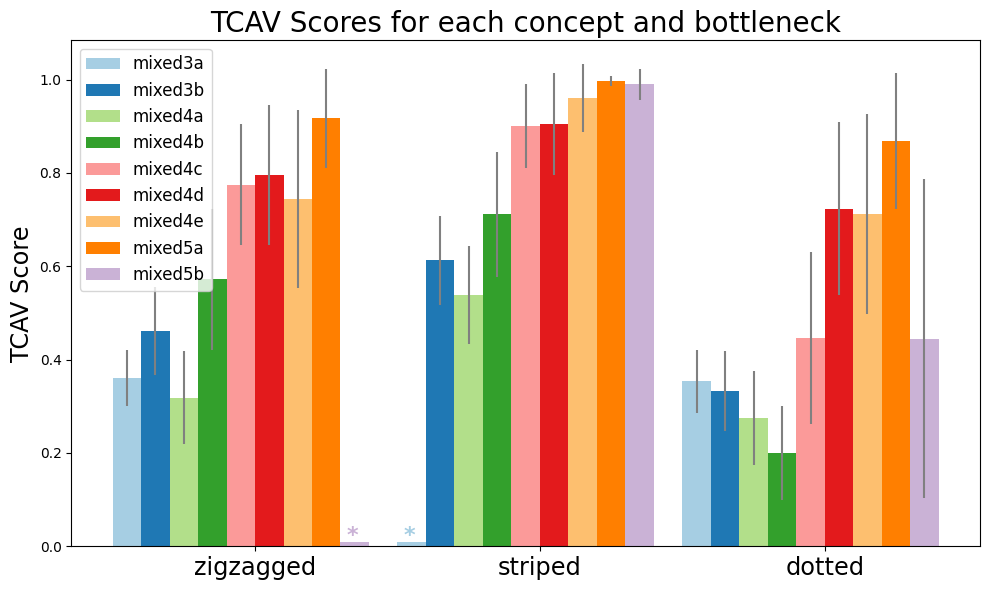

In [3]:
t_test_mean = 0.5 # None # if value given this will be a 1 sample t-test
bonferroni_nr = 2 #2
alternative = 'two-sided' # 'less' # 'greater' 
distribution_info = utils_plot.plot_results(data, num_random_exp=10, plot_hist = False,min_p_val=0.05, bonferroni_nr = bonferroni_nr,
alternative = alternative, t_test_mean = t_test_mean, save_fig = False) # 

In [4]:
# create 4 df with correct column names
layers = ['mixed3a', 'mixed3b', 'mixed4a', 'mixed4b', 'mixed4c', 'mixed4d','mixed4e', 'mixed5a', 'mixed5b']
idx = ['mean','std','p-value']

df_dot = pd.DataFrame(index = layers, columns = [np.array(['dotted']*3),np.array(idx)], dtype = 'float')
df_str = pd.DataFrame(index = layers, columns = [np.array(['striped']*3),np.array(idx)], dtype = 'float')
df_zig = pd.DataFrame(index = layers, columns = [np.array(['zigzagged']*3),np.array(idx)], dtype = 'float')
df_ran = pd.DataFrame(index = layers, columns = [np.array(['random']*3),np.array(idx)], dtype = 'float')

In [5]:

val_list = ['bn_vals','bn_stds','p-value']#,'significant']
for layer in layers:
    for v, value in enumerate(val_list):
        for i in range(3):
            if i == 2:
                df_dot.loc[layer,'dotted'][v] = distribution_info[layer][value][i]
            elif i == 1:
                distribution_info[layer][value][i]
                df_str.loc[layer,'striped'][v] = distribution_info[layer][value][i]
            else:
                distribution_info[layer][value][i]
                df_zig.loc[layer,'zigzagged'][v] = distribution_info[layer][value][i]

In [7]:
for layer in layers:
    print(layer,'significant',distribution_info[layer]['random_p-value'][3])
    for i, val in enumerate(idx):
        df_ran.loc[layer,'random'][val] = distribution_info[layer]['random_p-value'][i]
        

mixed3a significant True
mixed3b significant False
mixed4a significant True
mixed4b significant False
mixed4c significant True
mixed4d significant True
mixed4e significant True
mixed5a significant True
mixed5b significant True


In [8]:
df_ran

random                        
             mean       std       p-value
mixed3a  0.505623  0.104031  1.361966e-04
mixed3b  0.500854  0.127770  6.369905e-01
mixed4a  0.517599  0.163573  3.528185e-14
mixed4b  0.501882  0.185550  4.738228e-01
mixed4c  0.479216  0.206859  1.457627e-12
mixed4d  0.477764  0.240799  7.596615e-11
mixed4e  0.479170  0.261065  1.840350e-08
mixed5a  0.451766  0.322541  8.285535e-26
mixed5b  0.450275  0.352543  3.651315e-23

In [6]:
pd.concat([df_dot,df_str,df_zig],axis = 1)

dotted                           striped                           \
            mean       std        p-value     mean       std        p-value   
mixed3a  0.35318  0.066883  5.841494e-193  0.01000  0.000000   2.356813e-01   
mixed3b  0.33266  0.085678  2.004161e-172  0.61244  0.094818   3.345723e-97   
mixed4a  0.27520  0.100865  1.090617e-195  0.53786  0.105011   5.944853e-15   
mixed4b  0.19942  0.100201  1.231990e-251  0.71120  0.134168  3.679882e-137   
mixed4c  0.44708  0.184429   3.379681e-10  0.90090  0.090458   0.000000e+00   
mixed4d  0.72294  0.185223   4.221645e-99  0.90450  0.108848  3.267877e-294   
mixed4e  0.71206  0.213527   2.195221e-76  0.95954  0.072793   0.000000e+00   
mixed5a  0.86812  0.145487  4.767170e-219  0.99758  0.010842   0.000000e+00   
mixed5b  0.44460  0.341820   3.241369e-04  0.98952  0.033826   0.000000e+00   

        zigzagged                           
             mean       std        p-value  
mixed3a   0.36024  0.059883  4.500899e-204  
mixed3b   0.46136  0.094275   1.389027e-18  
mixed4a   0.31832  0.099996  3.415435e-160  
mixed4b   0.57248  0.151040   2.864318e-24  
mixed4c   0.77470  0.129592  1.020329e-186  
mixed4d   0.79546  0.150589  3.314647e-173  
mixed4e   0.74344  0.191008  1.289462e-106  
mixed5a   0.91704  0.105717  2.494610e-306  
mixed5b   0.01000  0.000000   9.874861e-01

In [9]:
with open(f'SavedResults/imagenet_tcav_results/concept_mean_std_pval_bonferroni_{bonferroni_nr}.tex', 'w') as tf:
     tf.write(pd.DataFrame.to_latex(pd.concat([df_dot,df_str,df_zig],axis = 1),float_format="{:.3e}".format,
     label = 'app_tab:imagenet stat num concept'))

with open(f'SavedResults/imagenet_tcav_results/random_mean_std_pval_bonferroni_{bonferroni_nr}.tex', 'w') as tf:
     tf.write(pd.DataFrame.to_latex(df_ran,float_format="{:.3e}".format, label = 'app_tab:imagenet stat num random'))


/tmp/ipykernel_27067/1468983682.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(pd.DataFrame.to_latex(pd.concat([df_dot,df_str,df_zig],axis = 1),float_format="{:.3e}".format,
/tmp/ipykernel_27067/1468983682.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(pd.DataFrame.to_latex(df_ran,float_format="{:.3e}".format, label = 'app_tab:imagenet stat num random'))
